In [23]:
from histogram import *
import matplotlib.pyplot as plt

I did start working on a few things that remained lose ends, 
including histogram representation of images and alternative satellite imagery

(385, 435, 161)
184
Afganistan demo image histogram visualization:


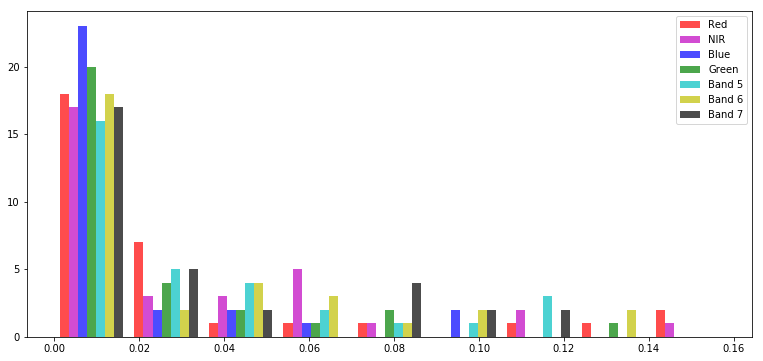

In [24]:
print("I did start working on a few things that remained lose ends, \nincluding histogram representation of images and alternative satellite imagery\n")

img_list = get_county_data('Afg', 'level1', '', 'MODIS', '1_275.tif')
print('Afganistan demo image histogram visualization:')
hist = calc_histograms(img_list[0], 7, 32)
sq = hist.squeeze()
idx = np.argmax(sq, axis=0) # (7,)
plt.figure(figsize=(13,6))
n, bins, patches = plt.hist(x=sq, bins='auto', alpha=0.7, rwidth=0.85, color=['r', 'm', 'b', 'g', 'c', 'y', 'k'], label=['Red','NIR','Blue','Green','Band 5','Band 6', 'Band 7'])
leg = plt.legend()
plt.show()



RGB visualization of the MODIS Surface Reflectance Product Image.


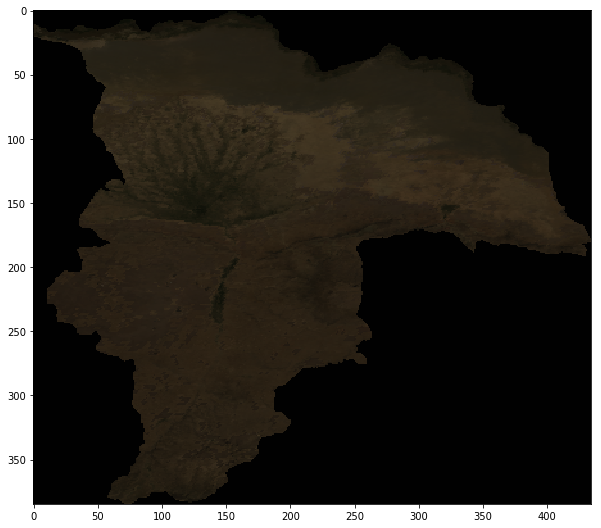

In [25]:
print('RGB visualization of the MODIS Surface Reflectance Product Image.')

img = np.transpose(np.array(gdal.Open('1_275.tif').ReadAsArray(), dtype='int16'),axes=(1,2,0))
img = img + np.ones(img.shape)*100
div = (255*np.ones(img.shape))/(16000 + 100)
sc_img = img*div
rgb = np.dstack((sc_img[:,:,0],sc_img[:,:,3],sc_img[:,:,2]))
rgb8 = rgb.astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(rgb8)
plt.show()

Another pixel intensity histogram of single time step of image.
x-axis is color instensity on a (0, 256] scale and y is the number of pixels.


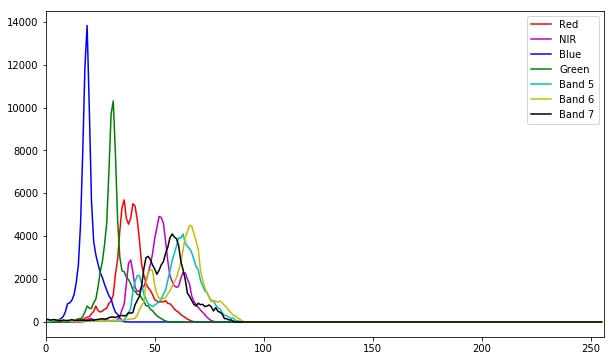

In [26]:
print('Another pixel intensity histogram of single time step of image.')
print('x-axis is color instensity on a (0, 256] scale and y is the number of pixels.')
#img = cv2.imread('home.jpg')
color = ('r', 'm', 'b', 'g', 'c', 'y', 'k')
labels = ['Red', 'NIR', 'Blue', 'Green', 'Band 5', 'Band 6', 'Band 7']
plt.figure(figsize=(10,6))
for i,col in enumerate(color):
    #histr = cv2.calcHist([img],[i],None,[256],[0,256])
    histr,bins = np.histogram(sc_img[:,:,i].ravel(),256, [2,256])
    plt.plot(histr,color = col, label = labels[i])
    leg = plt.legend()
    plt.xlim([0,256])
plt.show()

In [27]:
"""
Below is a set of tests to determine best settings for a mask
###########
vegimg = np.transpose(np.array(gdal.Open('1_275.tif').ReadAsArray(), dtype='int16'),axes=(1,2,0))

print('int mask count ', np.sum(np.where(np.sum(vegimg, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegimg, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegimg = vegimg*nan_mask
print('int ndvi mask',np.nanmean(vegimg[:,:,0]))
print('int evi mask', np.nanmean(vegimg[:,:,1]))


###########
vegimg = np.transpose(np.array(gdal.Open('1_272_veg.tif').ReadAsArray()),axes=(1,2,0))
vegimg_add = (np.where(vegimg < 0, vegimg+101, vegimg)).astype(np.uint16)

negs = np.sum(np.where(vegimg_add < 0, 1, 0))
total_pix = vegimg.shape[0]*vegimg.shape[1]*vegimg.shape[2]

zeros = np.sum(np.where(vegimg_add == 0, 1, 0))
print('add ratio zeros ',zeros/total_pix)

print('add ndvi',np.nanmean(vegimg_add[0]))
print('add evi', np.nanmean(vegimg_add[1]))

print('add mask count ', np.sum(np.where(np.sum(vegimg_add, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegimg_add, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegimg_add = vegimg_add*nan_mask
print('add ndvi mask',np.nanmean(vegimg_add[0]))
print('add evi mask', np.nanmean(vegimg_add[1]))

############


###########
vegimg = np.transpose(np.array(gdal.Open('1_272_veg.tif').ReadAsArray()),axes=(1,2,0))
vegi = np.where(vegimg < 0, np.nan, vegimg)

negs = np.sum(np.where(vegi < 0, 1, 0))
total_pix = vegimg.shape[0]*vegimg.shape[1]*vegimg.shape[2]

zeros = np.sum(np.where(vegi == 0, 1, 0))
print('nan ratio zeros ',zeros/total_pix)

print('nan ndvi',np.nanmean(vegi[0]))
print('nan evi', np.nanmean(vegi[1]))

print('nan mask count ', np.sum(np.where(np.sum(vegi, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegi, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegi = vegi*nan_mask
print('nan ndvi mask',np.nanmean(vegi[0]))
print('nan evi mask', np.nanmean(vegi[1]))


###########
vegimg = np.transpose(np.array(gdal.Open('1_272_veg.tif').ReadAsArray()),axes=(1,2,0))
vegimg_add = (np.where(vegimg < 0, 0, vegimg)).astype(np.uint16)

negs = np.sum(np.where(vegimg_add < 0, 1, 0))
total_pix = vegimg.shape[0]*vegimg.shape[1]*vegimg.shape[2]

zeros = np.sum(np.where(vegimg_add == 0, 1, 0))
print('zero ratio zeros ',zeros/total_pix)

print('zero ndvi',np.nanmean(vegimg_add[0]))
print('zero evi', np.nanmean(vegimg_add[1]))

print('zero mask count ', np.sum(np.where(np.sum(vegimg_add, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegimg_add, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegimg_add = vegimg_add*nan_mask
print('zero ndvi mask',np.nanmean(vegimg_add[0]))
print('zero evi mask', np.nanmean(vegimg_add[1]))

############

vegimg = np.transpose(np.array(gdal.Open('1_275.tif').ReadAsArray(), dtype='uint16'),axes=(1,2,0))


print('uint mask count ', np.sum(np.where(np.sum(vegimg, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegimg, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegimg = vegimg*nan_mask
print('uint ndvi mask',np.nanmean(vegimg[:,:,0]))
print('uint evi mask', np.nanmean(vegimg[:,:,1]))
"""
print('We successfully pulled the MODIS NDVI/EVI product.')
vegimg = np.transpose(np.array(gdal.Open('1_272_veg.tif').ReadAsArray()),axes=(1,2,0))
print('MODIS NDVI/EVI product demo image shape: ',vegimg.shape)

print('mask count ', np.sum(np.where(np.sum(vegimg, axis = 2) == 0, 1, 0)))

nan_mask = np.where(np.sum(vegimg, axis = 2) == 0, np.nan, 1)[:, :, np.newaxis]
vegimg = vegimg*nan_mask
print('ndvi mask',np.nanmean(vegimg[:,:,0]))
print('evi mask', np.nanmean(vegimg[:,:,1]))



We successfully pulled the MODIS NDVI/EVI product.
MODIS NDVI/EVI product demo image shape:  (680, 1093, 22)
mask count  522721
ndvi mask 1727.4110575505965
evi mask 1066.2807739922637


We successfully pulled the VIIRS nightlights product.
RAW image max:  34.88188171386719
RAW image min:  -0.326991468667984
RAW image mean:  0.1260882041379156
Total demo image shape (channel/num images @ index 0) (32, 339, 532)


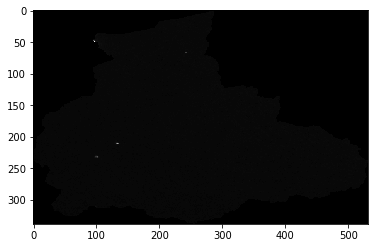

You can't really see the lights but they are there. I swear.
There is 100% a speck in the top leftish corner.


In [28]:
# Display pulled image
print('We successfully pulled the VIIRS nightlights product.')
img = (np.array(gdal.Open('1_273l.tif').ReadAsArray()))
print('RAW image max: ', np.nanmax(img))
print('RAW image min: ', np.nanmin(img))
print('RAW image mean: ', np.nanmean(img))


img = img - np.ones(img.shape)*np.nanmin(img)
img = np.nan_to_num(img)

div = (255*np.ones(img.shape))/(np.nanmax(img))
img *= div
img = img.astype(np.uint8)
print('Total demo image shape (channel/num images @ index 0)', img.shape)
plt.imshow(img[0], cmap="gray")
plt.show()
print("You can't really see the lights but they are there. I swear.")
print("There is 100% a speck in the top leftish corner.")